**FGV EPGE - Escola de Pós-graduação em Economia**
==
**Trabalho da Disciplina Deep Learning**
==

Professores: 


Monitora: 

Alunas: 

**Amazon Fine Food Reviews**

Analyze ~500,000 food reviews from Amazon.

## Based on **CRISP-DM**

The CRoss Industry Standard Process for Data Mining (CRISP-DM) is a process model that serves as the base for a data science process. It has six sequential phases:

- 1. Business understanding – What does the business need?
- 2. Data understanding – What data do we have / need? Is it clean?
- 3. Data preparation – How do we organize the data for modeling?
- 4. Modeling – What modeling techniques should we apply?
- 5. Evaluation – Which model best meets the business objectives?
- 6. Deployment – How do stakeholders access the results?

In [62]:
## libraries
import time
start_time = time.time()

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date
from datetime import datetime
import os.path
import sys
import gc

# release memory RAM
def release_memory(df):   
    del df
    gc.collect() 
    df = pd.DataFrame() # point to NULL
    print('memory RAM released.')

# release memory for large arrays (dictionary)
def release_array(dd):
    del dd 
    gc.collect()
    dd = None

In [63]:
# Reduce DataFrame size
# This part of the code is not my, I get from this webpage: 
# https://www.mikulskibartosz.name/how-to-reduce-memory-usage-in-pandas/
def reduce_mem_usage(df):
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))

    for col in df.columns:
        col_type = df[col].dtype
    if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.uint8).min and c_max < np.iinfo(np.uint8).max:
                    df[col] = df[col].astype(np.uint8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.uint16).min and c_max < np.iinfo(np.uint16).max:
                    df[col] = df[col].astype(np.uint16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.uint32).min and c_max < np.iinfo(np.uint32).max:
                    df[col] = df[col].astype(np.uint32)                    
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)
                elif c_min > np.iinfo(np.uint64).min and c_max < np.iinfo(np.uint64).max:
                    df[col] = df[col].astype(np.uint64)
            elif str(col_type)[:5] == 'float':
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    return df

In [64]:
import requests as re
import re # for regex
import nltk
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')
#nltk.download('all')
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score
import pickle
from transformers import BertTokenizer, BertForSequenceClassification
from nltk.tokenize import word_tokenize
import string
from collections import Counter
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import recall_score

import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM
from tensorflow.keras.preprocessing import sequence
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping


[nltk_data] Downloading package wordnet to /home/andsilva/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/andsilva/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/andsilva/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [65]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import accuracy_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_curve
from sklearn.feature_extraction.text import CountVectorizer
from imblearn.over_sampling import SMOTE

In [66]:
now = datetime.now()
 
print("date..............:", now)

date..............: 2023-05-21 21:04:13.213907


### 1. Business understanding – What does the business need?

Compreender o contexto de negócios para a análise de sentimentos em avaliações de alimentos da Amazon é fundamental para identificar como essa análise pode ser aplicada de maneira relevante. Para a compreensão do negócio para a análise de sentimentos nessas avaliações:

1. **Descrição do problema**:
   A Amazon é uma das maiores varejistas online do mundo e possui uma vasta variedade de produtos disponíveis, incluindo alimentos. Os clientes têm a oportunidade de deixar avaliações e comentários sobre esses produtos, o que pode influenciar as decisões de compra de outros consumidores.

   A análise de sentimentos em avaliações de alimentos da Amazon visa extrair informações valiosas dessas avaliações, identificando a polaridade (positiva, negativa ou neutra) dos sentimentos expressos pelos clientes. Isso permite que a Amazon entenda melhor a satisfação do cliente em relação a um determinado produto e tome medidas adequadas para melhorar a experiência do cliente e a qualidade dos produtos oferecidos.

2. **Objetivos do negócio**:
   - Compreender a satisfação do cliente: A análise de sentimentos ajuda a determinar se os clientes estão satisfeitos ou insatisfeitos com os alimentos adquiridos na Amazon. Isso permite à empresa ter uma visão geral da percepção dos clientes em relação aos produtos oferecidos e identificar possíveis problemas ou áreas de melhoria.

   - Tomar decisões de negócios informadas: Ao analisar os sentimentos expressos nas avaliações, a Amazon pode identificar padrões e tendências que ajudam a tomar decisões informadas sobre quais produtos devem ser promovidos, quais necessitam de melhorias ou quais devem ser descontinuados.

   - Personalização da experiência do cliente: Com base na análise de sentimentos, a Amazon pode fornecer recomendações personalizadas aos clientes, levando em consideração suas preferências e opiniões expressas em avaliações anteriores. Isso melhora a experiência de compra do cliente e aumenta a fidelidade à marca.

3. **Fonte de dados**:
   A fonte de dados para a análise de sentimentos são as avaliações dos clientes sobre alimentos da Amazon. Esses dados podem incluir informações como texto da avaliação, classificação (por exemplo, de 1 a 5 estrelas), data da avaliação e informações do cliente (por exemplo, nome, localização, histórico de compras).

   Essas avaliações podem ser coletadas por meio da API pública da Amazon ou por meio de um conjunto de dados já disponível contendo avaliações históricas.

4. **Métricas de avaliação**:
   As métricas comuns para avaliar a eficácia da análise de sentimentos em avaliações de alimentos podem incluir:
   - Acurácia: percentual de avaliações classificadas corretamente em termos de sentimento (positivo, negativo ou neutro).
   - Precisão e revocação: medidas que indicam a proporção de avaliações positivas/negativas corretamente identificadas em relação ao total de avaliações positivas/negativas presentes nos dados.

   Outras métricas podem ser usadas, dependendo dos objetivos específicos do negócio.

In [67]:
## https://www.datascience-pm.com/crisp-dm-2/

#### https://www.kaggle.com/datasets/snap/amazon-fine-food-reviews
df_reviews = pd.read_csv('../dataset/Reviews.csv') # full dataset

# reduce memory usage
df_reviews = reduce_mem_usage(df_reviews)

# dataset size:
print(f'Numero de linhas: {df_reviews.shape[0]}, numero de colunas: {df_reviews.shape[1]}') 

Memory usage of dataframe is 43.37 MB
Memory usage after optimization is: 43.37 MB
Decreased by 0.0%
Numero de linhas: 568454, numero de colunas: 10


### 2. Data understanding – What data do we have / need? Is it clean?

- Explorar os dados:
  - Carregue o conjunto de dados em Python e examine sua estrutura e conteúdo.
  - Verifique as diferentes colunas presentes nos dados, como o texto do comentário, a classificação (positiva ou negativa) ou outras informações relevantes.

In [68]:
######## parte do dataset
df_reviews_copy = df_reviews.copy()
df_reviews_sample = df_reviews_copy.sample(10000) # FIXME remover no final

# release memory RAM - dataframe
release_memory(df_reviews_copy)
release_memory(df_reviews)
df_reviews = df_reviews_sample[['Score', 'Text']] # select o
release_memory(df_reviews_sample)

memory RAM released.
memory RAM released.
memory RAM released.


### Data preparation – How do we organize the data for modeling?

In [69]:
# Lista de valores faltantes
df_reviews.isna().sum()

Score    0
Text     0
dtype: int64

In [70]:
# dataset - tamanho
df_reviews.shape

(10000, 2)

In [71]:
# retirar linha com valores faltantes
df_reviews = df_reviews.dropna()

In [72]:
# checar numero de linha faltantes
df_reviews.isna().sum()

Score    0
Text     0
dtype: int64

In [73]:
df_reviews.shape

(10000, 2)

In [74]:
# retirar os neutros.
df_reviews = df_reviews[df_reviews['Score'] != 3]

In [75]:
df_reviews.head(3)

,Score,Text
181755,5,Have tried lots of different favors and this i...
84375,5,I received the plants in good condition and th...
69158,4,I love having a Larabar for breakfast each day...


In [76]:
# lista a quantidade de cada categoria de score.
df_reviews['Score'].value_counts()

5    6439
4    1406
1     887
2     512
Name: Score, dtype: int64

In [77]:
# redefinir score
def sentiment(label):
    if label == 5.0 or label == 4.0:
        return "0"
    #elif label == 3.0:
    #    return "Neutral"
    elif label == 1.0 or label == 2.0:
        return "1"
df_reviews['negative'] = df_reviews["Score"].apply(sentiment)

In [78]:
df_reviews["negative"].value_counts()

0    7845
1    1399
Name: negative, dtype: int64

In [79]:
#Mude df5 para df3 para pegar toda base
texts = df_reviews['Text'].sum()
texts[0:1000]

"Have tried lots of different favors and this is by far the best.  Not too strong and no nasty aftertaste like some leave.  This is now the only flavor I buy!I received the plants in good condition and they have thrived since transplanting. They are now three times the size as when I got them. I would buy them again.I love having a Larabar for breakfast each day. The banana bread flavor is delicious and full of healthy fruit and nuts, but after eating the whole pack, I was a little tired of it. Next time, I'm springing for apple pie.Sent to us as a gift from our San Diego son, It disappeared in two weeks.<br />Frantically searched for it on Google, as it has become a near daily staple<br />for lunch & snacks. Found it via Amazon.  Just enough of a different flavor,<br />to diferenciate it from peanut butter,& mildly crunchy to keep it from being bland.  A Great product, and just wish it was here on the<br />grocery shelves in Tidewater Virginia!I LOVE these graham sticks.  They dissolv

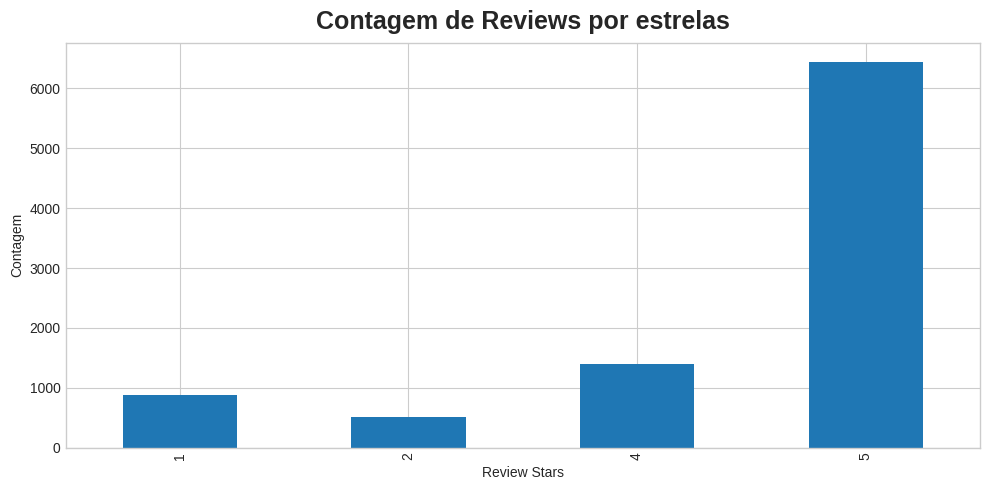

In [80]:
ax = df_reviews['Score'].value_counts().sort_index().plot(kind='bar',
                                                  title='Contagem de Reviews por estrelas',
                                                  figsize=(10, 5)
                                                 )

ax.set_xlabel('Review Stars')
ax.set_ylabel('Contagem')
plt.show()

In [81]:
stop_pt = nltk.corpus.stopwords.words('portuguese')
stop_en = nltk.corpus.stopwords.words('english')
stopwords_pa = stop_en + stop_pt
stopwords_pa.extend(['-',''])

In [82]:
list_words = texts.split()
list_words = [l.strip().lower() for l in list_words]


In [83]:
# lista de palavras do Text 'reviews'
list_words = [l.strip(string.punctuation) for l in list_words]
list_words = [l for l in list_words if l not in stopwords_pa]
freqdist = Counter(list_words)
dict(freqdist.most_common(10))

{'br': 4105,
 'like': 3869,
 'good': 3041,
 'one': 2649,
 'great': 2545,
 'taste': 2545,
 'coffee': 2384,
 'product': 2152,
 'flavor': 2067,
 'food': 2067}

In [84]:
from wordcloud import WordCloud
cleaned = ' '.join(list_words)
wordcloud = WordCloud().generate(cleaned)

### Nuvem de Palavras

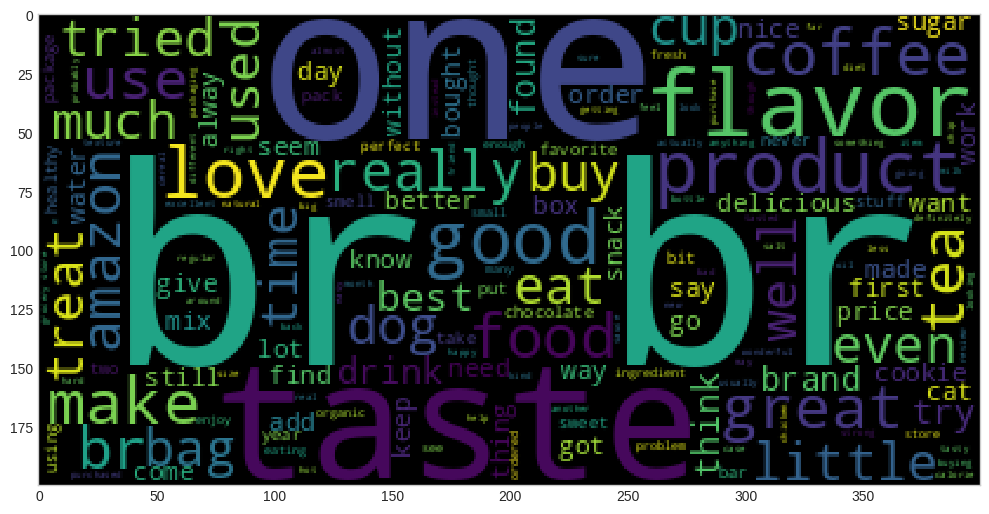

In [85]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(wordcloud, interpolation='nearest')
plt.grid(False)
plt.tight_layout()

In [86]:
freq_common_works = dict(freqdist.most_common(10))
freq_common_works

{'br': 4105,
 'like': 3869,
 'good': 3041,
 'one': 2649,
 'great': 2545,
 'taste': 2545,
 'coffee': 2384,
 'product': 2152,
 'flavor': 2067,
 'food': 2067}

In [87]:
common_words = list(freq_common_works.keys())
common_words = common_words[0:4]

In [88]:
dispersion_words = common_words
plt.figure(figsize=(16,6))
#nltk_text.dispersion_plot(dispersion_words)

<Figure size 1600x600 with 0 Axes>

<Figure size 1600x600 with 0 Axes>

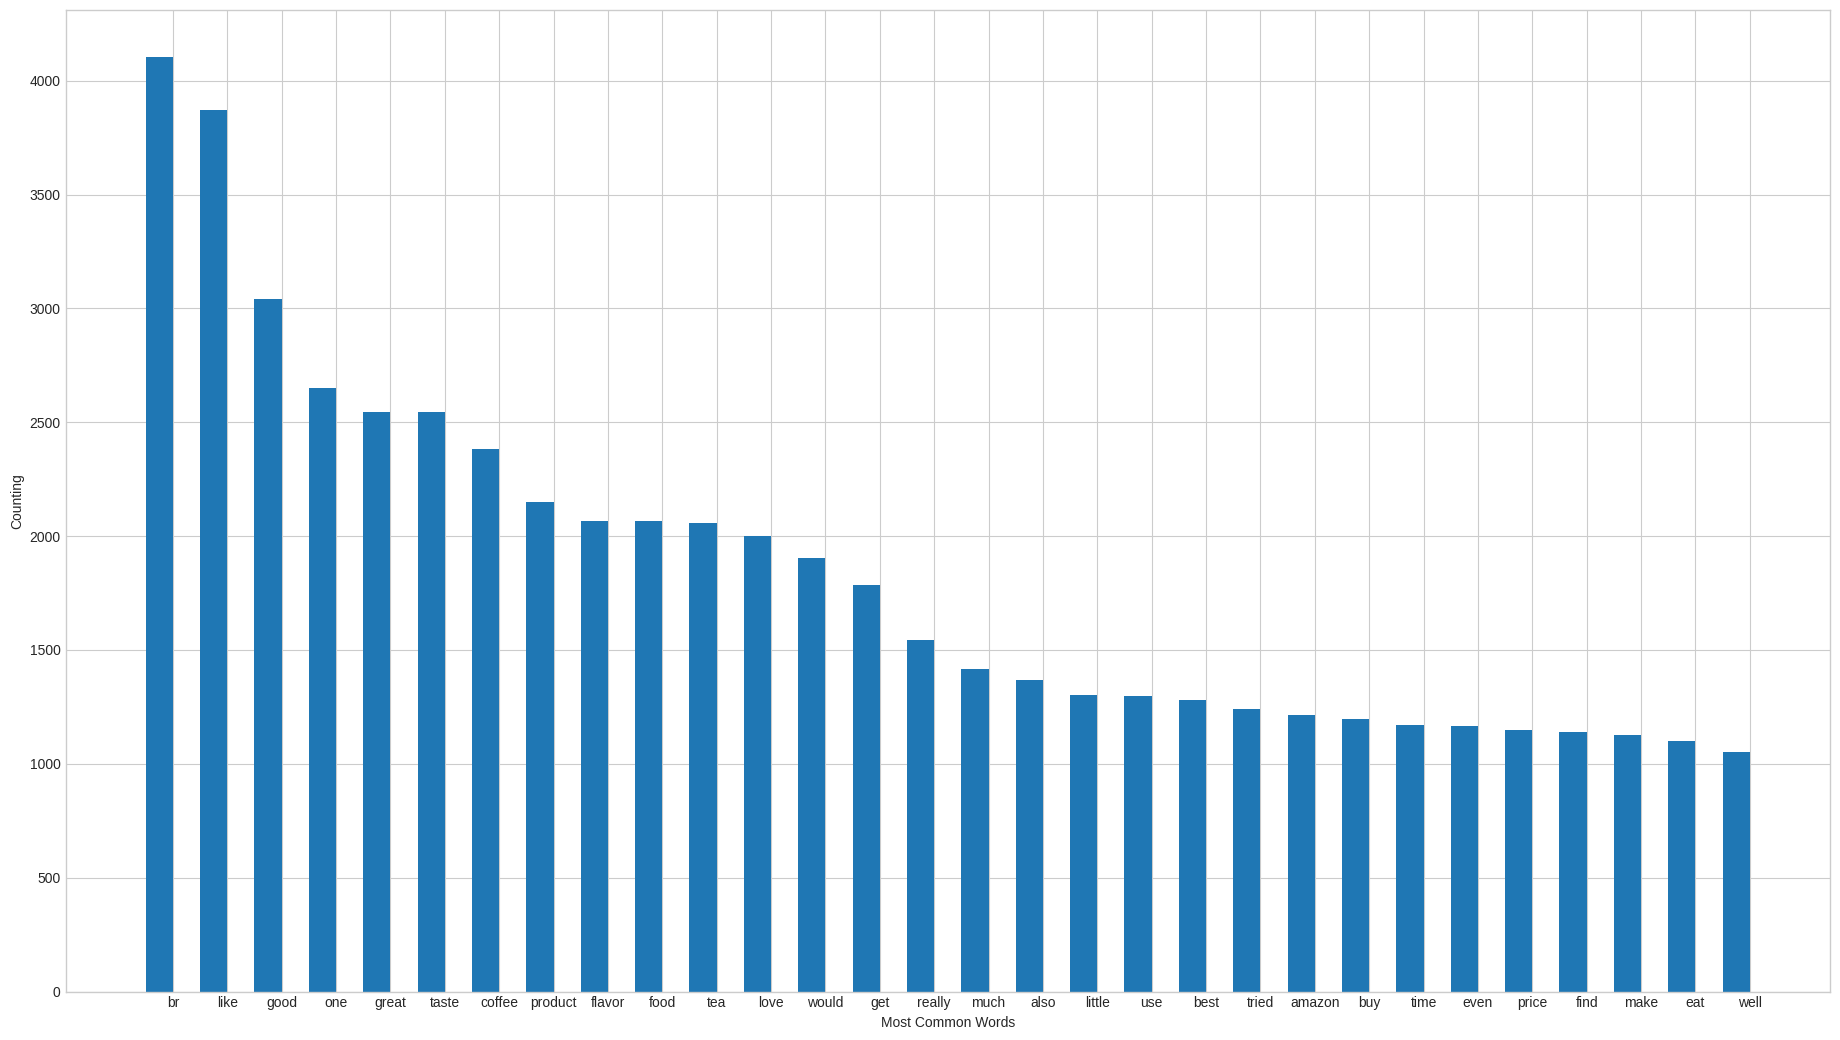

In [89]:
labels, values = zip(*freqdist.most_common(30))

indexes = np.arange(len(labels))
width = 0.5

plt.bar(indexes, values, width)
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.xticks(indexes + width * 0.5, labels)
plt.xlabel('Most Common Words') 
plt.ylabel('Counting') 
plt.show()

In [90]:
# remove tags html
# cleaning
def clean(text):
    cleaned = re.compile(r'<.*?>')
    return re.sub(cleaned,'',text)

df_reviews['Text'] = df_reviews['Text'].apply(clean)

In [91]:
# remover caracteres especiais
def is_special(text):
    rem = ''
    for i in text:
        if i.isalnum():
            rem = rem + i
        else:
            rem = rem + ' '
    return rem

df_reviews['Text'] = df_reviews['Text'].apply(is_special)

In [92]:
# Converter - lowercase
def to_lower(text):
    return text.lower()

df_reviews['Text'] = df_reviews['Text'].apply(to_lower)

In [93]:
nltk.download('stopwords')
nltk.download('punkt')

def rem_stopwords(text):
    stop_words = set(stopwords.words('english'))
    words = word_tokenize(text)
    return [w for w in words if w not in stop_words]

df_reviews['Text'] = df_reviews['Text'].apply(rem_stopwords)


[nltk_data] Downloading package stopwords to
[nltk_data]     /home/andsilva/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/andsilva/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [94]:
#No review tenha palavras de outro idioma
def stem_txt(text):
    ss = SnowballStemmer('english')
    return " ".join([ss.stem(w) for w in text])

df_reviews['Text'] = df_reviews['Text'].apply(stem_txt)
#df_reviews['Text']

In [95]:
df_reviews.columns

Index(['Score', 'Text', 'negative'], dtype='object')

In [96]:
# converter string para inteiro
df_reviews['negative'] = pd.to_numeric(df_reviews['negative'])

In [97]:
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9244 entries, 181755 to 305
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Score     9244 non-null   int64 
 1   Text      9244 non-null   object
 2   negative  9244 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 288.9+ KB


In [98]:
df_reviews['Text']

181755    tri lot differ favor far best strong nasti aft...
84375     receiv plant good condit thrive sinc transplan...
69158     love larabar breakfast day banana bread flavor...
343117    sent us gift san diego son disappear two week ...
58879     love graham stick dissolv well super yummi yes...
                                ...                        
340771    light crispi flavor perfect dip bought mine su...
202736    great product great tast great choic k cup mak...
477671    parent pleas receiv thank send us high qualiti...
386775    first bought product close health food store s...
305       first time realli misl review amazon like 5 hr...
Name: Text, Length: 9244, dtype: object

In [99]:
# create preprocess_text function
def preprocess_text(text):
    # Tokenize the text
    tokens = word_tokenize(text.lower())

    # Remove stop words
    filtered_tokens = [token for token in tokens if token not in stopwords.words('english')]

    # Lemmatize the tokens
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in filtered_tokens]


    # Join the tokens back into a string
    processed_text = ' '.join(lemmatized_tokens)
    return processed_text

In [100]:
df_reviews['Text'] = df_reviews['Text'].apply(preprocess_text)
df_reviews['Text']

181755    tri lot differ favor far best strong nasti aft...
84375     receiv plant good condit thrive sinc transplan...
69158     love larabar breakfast day banana bread flavor...
343117    sent u gift san diego son disappear two week f...
58879     love graham stick dissolv well super yummi yes...
                                ...                        
340771    light crispi flavor perfect dip bought mine su...
202736    great product great tast great choic k cup mak...
477671    parent plea receiv thank send u high qualiti f...
386775    first bought product close health food store s...
305       first time realli misl review amazon like 5 hr...
Name: Text, Length: 9244, dtype: object

In [101]:
X = df_reviews['Text']
y = df_reviews['negative']

In [102]:
# release memory RAM
release_memory(df_reviews)

memory RAM released.


In [103]:
## Convert a collection of text documents to a matrix of token counts.
cv = CountVectorizer()

# feature
X = cv.fit_transform(X).toarray() # array type

smote = SMOTE()

# inbalance data to balance
X, y = smote.fit_resample(X, y)

print("X.shape = ",X.shape)
print("y.shape = ",y.shape)

X.shape =  (15690, 13871)
y.shape =  (15690,)


In [104]:
x_train, x_validation, y_train, y_validation = train_test_split(X, y, test_size=0.2, random_state=0)

In [105]:
# release memory - array
release_array(X)
release_array(y)

In [106]:
#Criando funções para avaliação dos modelos
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize=(8,8))
    plt.imshow(cm, interpolation='nearest', cmap=cmap, aspect='auto')
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.grid(False)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [107]:
def clf_eval(clf, X, y_true, classes=['Positivo', 'Negativo']):
    y_pred = clf.predict(X)
    clf_matrix = confusion_matrix(y_true, y_pred)
    print('Classification Report')
    print(classification_report(y_true, y_pred, target_names=classes))
    print('ROC Score: {}'.format(roc_auc_score(y_true, y_pred)))
    print('Accuracy Score: {}'.format(accuracy_score(y_true, y_pred)))
    print('Average Precision Score: {}'.format(average_precision_score(y_true, y_pred)))
    print('f1 Score: {}'.format(f1_score(y_true, y_pred)))
    plot_confusion_matrix(clf_matrix, classes=classes)
    return roc_auc_score(y_true, y_pred)

## Modeling – What modeling techniques should we apply?

### Machine Learning

#### Gaussian Naive Bayes (GaussianNB).

In [108]:
from sklearn.naive_bayes import GaussianNB

clf_gnb = GaussianNB().fit(x_train, y_train)


### Evaluation – Which model best meets the business objectives?

Classification Report
              precision    recall  f1-score   support

    Positivo       1.00      0.69      0.81      6287
    Negativo       0.76      1.00      0.86      6265

    accuracy                           0.84     12552
   macro avg       0.88      0.84      0.84     12552
weighted avg       0.88      0.84      0.84     12552

ROC Score: 0.8432479720057261
Accuracy Score: 0.8429732313575525
Average Precision Score: 0.7606847984458475
f1 Score: 0.8640783394248672
Confusion matrix, without normalization
[[4316 1971]
 [   0 6265]]


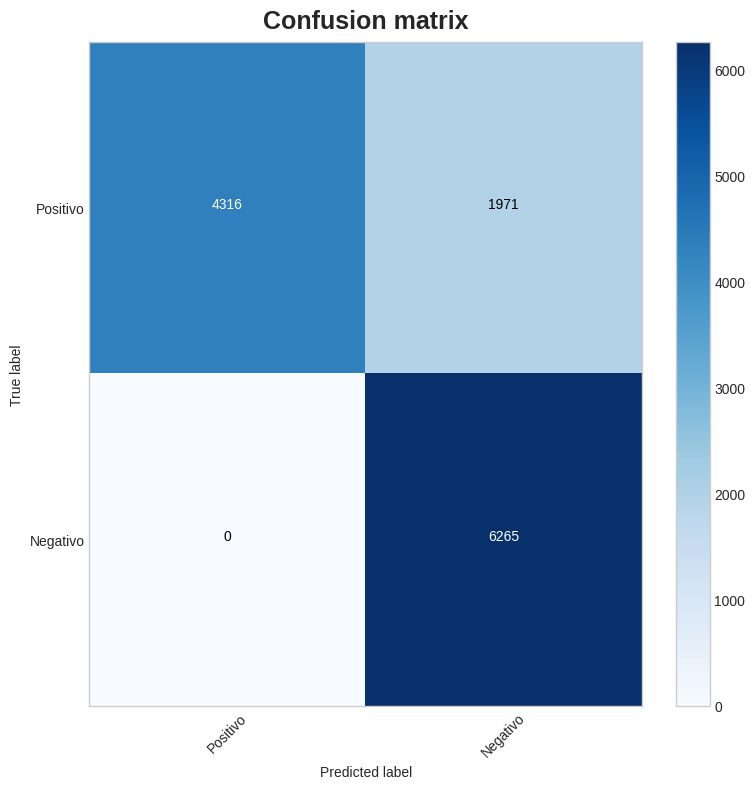

In [109]:
roc_gnb = clf_eval(clf_gnb, x_train, y_train)

#### Naive Bayes classifier for multivariate Bernoulli model

In [110]:
from sklearn.naive_bayes import BernoulliNB

clf_bnb = BernoulliNB(alpha=0.20, 
                     binarize=0.0, 
                     fit_prior=True, 
                     class_prior=None).fit(x_train, y_train)


### Evaluation – Which model best meets the business objectives?

Classification Report
              precision    recall  f1-score   support

    Positivo       0.88      0.75      0.81      6287
    Negativo       0.78      0.90      0.84      6265

    accuracy                           0.83     12552
   macro avg       0.83      0.83      0.82     12552
weighted avg       0.83      0.83      0.82     12552

ROC Score: 0.8259729758171608
Accuracy Score: 0.8258444869343531
Average Precision Score: 0.7550355458957654
f1 Score: 0.8375204400178387
Confusion matrix, without normalization
[[4732 1555]
 [ 631 5634]]


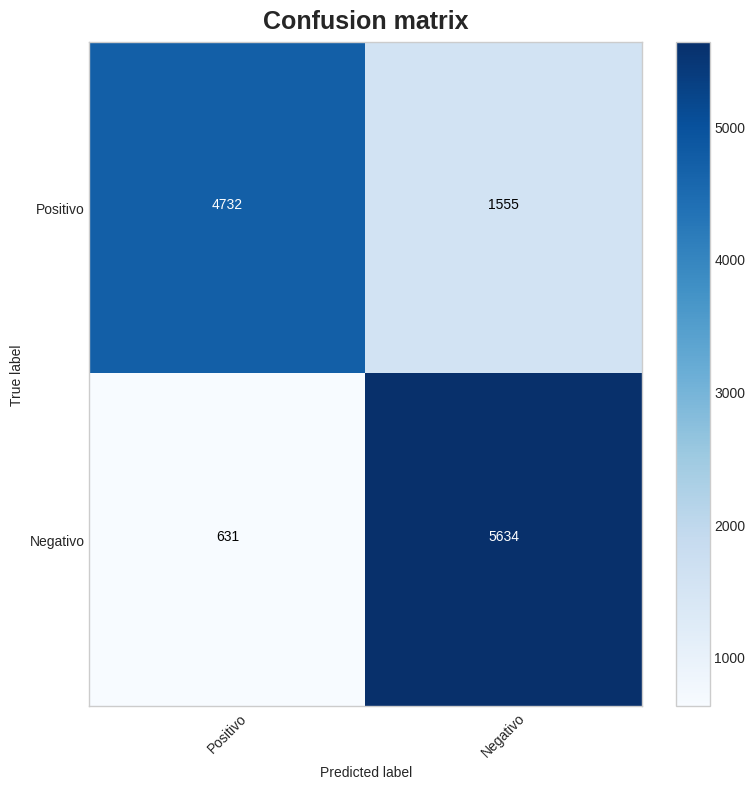

In [111]:
roc_bnb = clf_eval(clf_bnb, x_train, y_train)

#### Gradient Boosting for classification.

In [112]:
gb_clf = GradientBoostingClassifier()
gb_clf_sa =gb_clf.fit(x_train, y_train)
pred_train = gb_clf_sa.predict(x_train)

### Evaluation – Which model best meets the business objectives?

Classification Report
              precision    recall  f1-score   support

    Positivo       0.90      0.83      0.86      1558
    Negativo       0.84      0.91      0.88      1580

    accuracy                           0.87      3138
   macro avg       0.87      0.87      0.87      3138
weighted avg       0.87      0.87      0.87      3138

ROC Score: 0.8693765132188296
Accuracy Score: 0.8696622052262588
Average Precision Score: 0.8128541135981485
f1 Score: 0.8754946727549467
Confusion matrix, without normalization
[[1291  267]
 [ 142 1438]]


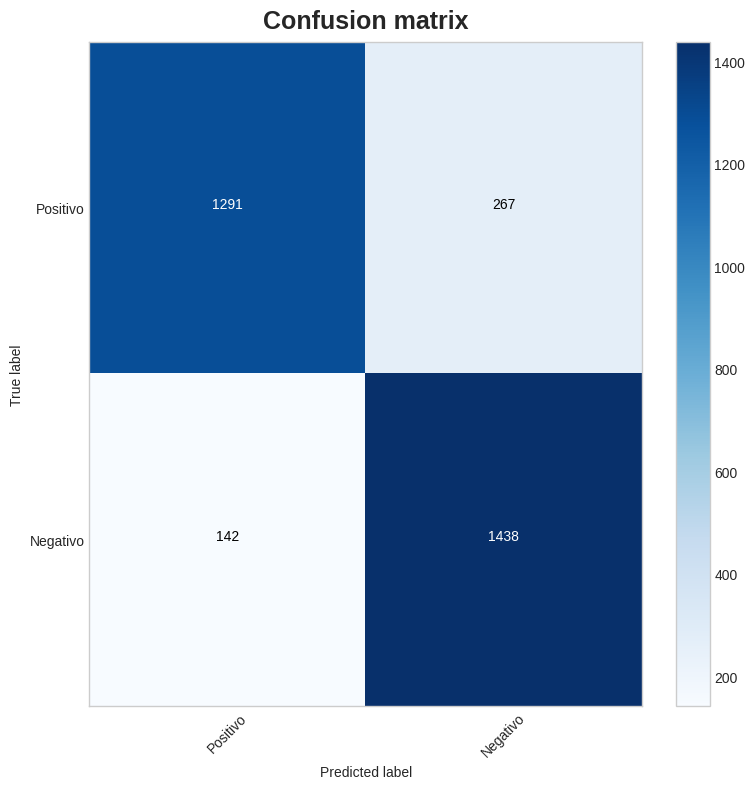

In [113]:
roc_gb = clf_eval(gb_clf_sa, x_validation, y_validation)

#### Deep learning: Keras

In [114]:
plt.style.use("seaborn-v0_8-whitegrid")
# Set Matplotlib defaults
plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large',
       titleweight='bold', titlesize=18, titlepad=10)

In [115]:
model = keras.Sequential([layers.Dense(1024, activation='relu'),
                          layers.Dropout(0.3),
                          layers.BatchNormalization(),
                          layers.Dense(1024, activation='relu'),
                          layers.Dropout(0.3),
                          layers.BatchNormalization(),
                          layers.Dense(1024, activation='sigmoid'),
                          layers.Dropout(0.3),
                          layers.BatchNormalization(),
                          layers.Dense(1),
                         ])

model.compile(optimizer='adam', loss='mae',)

In [116]:
# fitting...
history = model.fit(x_train, y_train,
                    validation_data=(x_validation, y_validation),
                    batch_size=256,
                    epochs=10,
                    verbose=1,
                   )

Epoch 1/10


2023-05-21 21:13:33.493451: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 1392870336 exceeds 10% of free system memory.


50/50 [==============================] - 14s 246ms/step - loss: 1.0889 - val_loss: 0.4878
Epoch 2/10
50/50 [==============================] - 12s 238ms/step - loss: 0.6476 - val_loss: 0.4638
Epoch 3/10
50/50 [==============================] - 12s 241ms/step - loss: 0.3951 - val_loss: 0.4533
Epoch 4/10
50/50 [==============================] - 12s 237ms/step - loss: 0.2598 - val_loss: 0.4820
Epoch 5/10
50/50 [==============================] - 12s 249ms/step - loss: 0.1953 - val_loss: 0.4256
Epoch 6/10
50/50 [==============================] - 12s 244ms/step - loss: 0.1496 - val_loss: 0.3977
Epoch 7/10
50/50 [==============================] - 12s 240ms/step - loss: 0.1129 - val_loss: 0.3176
Epoch 8/10
50/50 [==============================] - 12s 241ms/step - loss: 0.0981 - val_loss: 0.2119
Epoch 9/10
50/50 [==============================] - 12s 237ms/step - loss: 0.0859 - val_loss: 0.1487
Epoch 10/10
50/50 [==============================] - 13s 251ms/step - loss: 0.0847 - val_loss: 0.1421


### Evaluation – Which model best meets the business objectives?

The loss function compares the prediction generated by the model with the true value. It calculates a numerical value that represents the mismatch or error between the predicted and the true value.

Text(0.5, 1.0, 'The learning curves')

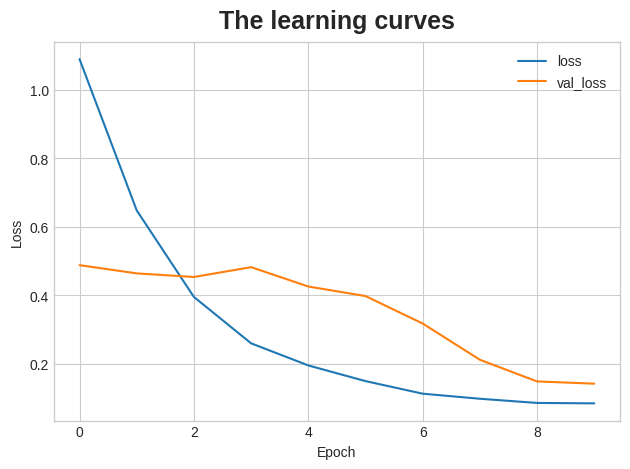

In [117]:
# Show the learning curves
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('The learning curves')

99/99 [==============================] - 1s 12ms/step
Classification Report
              precision    recall  f1-score   support

    Positivo       0.90      0.99      0.94      1558
    Negativo       0.98      0.89      0.93      1580

    accuracy                           0.94      3138
   macro avg       0.94      0.94      0.94      3138
weighted avg       0.94      0.94      0.94      3138

ROC Score: 0.9378763750995271
Accuracy Score: 0.9375398342893563
Average Precision Score: 0.9316132140587678
f1 Score: 0.934840425531915
Confusion matrix, without normalization
[[1536   22]
 [ 174 1406]]


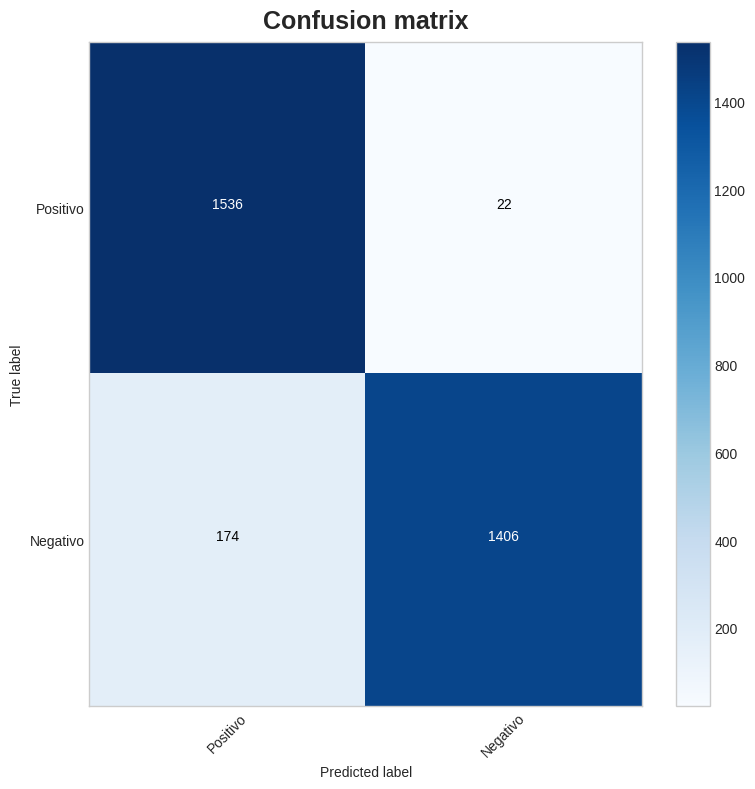

In [118]:
y_pred= (model.predict(x_validation) > 0.5).astype("int32")

clf_matrix = confusion_matrix(y_validation, y_pred)
print('Classification Report')
print(classification_report(y_validation, y_pred, target_names=['Positivo', 'Negativo']))
print('ROC Score: {}'.format(roc_auc_score(y_validation,y_pred)))
print('Accuracy Score: {}'.format(accuracy_score(y_validation, y_pred)))
print('Average Precision Score: {}'.format(average_precision_score(y_validation, y_pred)))
print('f1 Score: {}'.format(f1_score(y_validation, y_pred)))
plot_confusion_matrix(clf_matrix, classes=['Positivo', 'Negativo'])
roc_keras = roc_auc_score(y_validation, y_pred)

In [119]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') 
    plt.axis([0, 1, 0, 1])                                    
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) 
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)    
    plt.grid(True) 

In [120]:
clf_gnb_roc = clf_gnb.predict(x_validation)
gnb_roc_auc = roc_auc_score(y_validation, clf_gnb_roc)

model_roc = model.predict(x_validation)  # keras
model_roc_auc = roc_auc_score(y_validation, model_roc)


fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_validation, clf_gnb_roc)
fpr_net, tpr_net_lr, thresholds_net_lr = roc_curve(y_validation, model_roc)

99/99 [==============================] - 1s 12ms/step


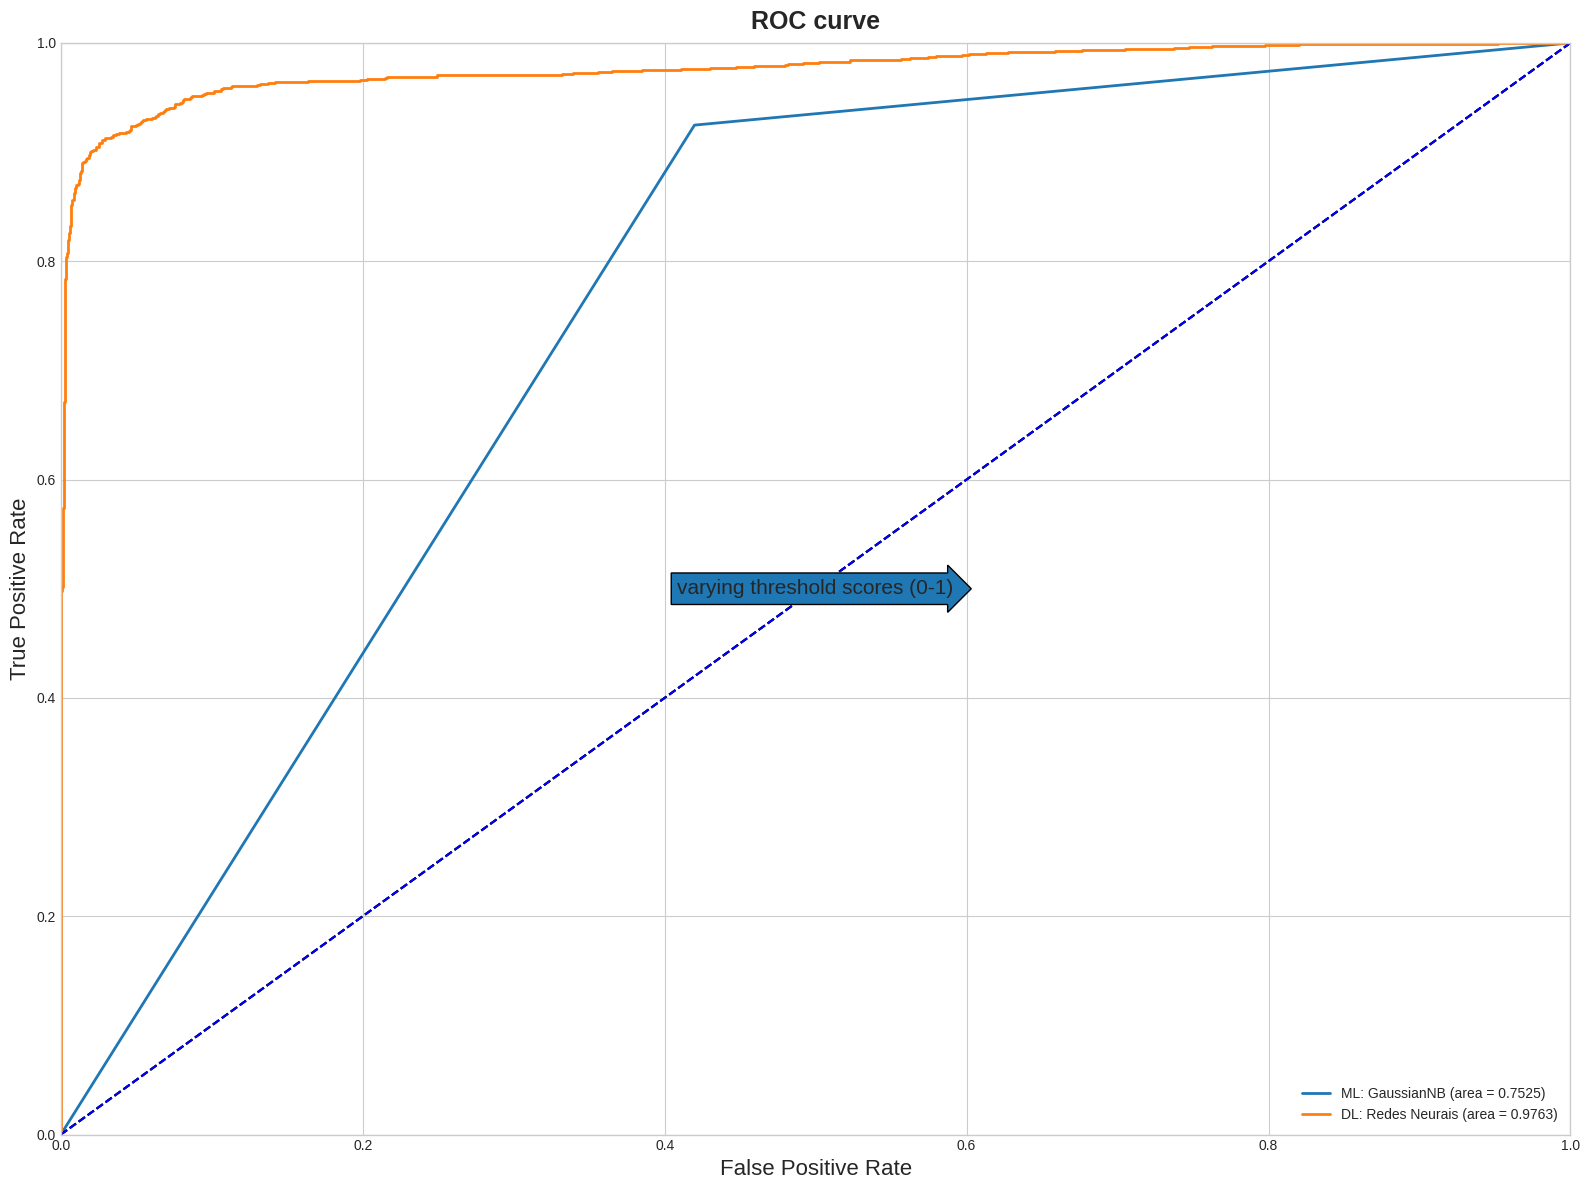

In [121]:
plt.figure(figsize=(16, 12))                                    # Not shown
plot_roc_curve(fpr_lr, tpr_lr, label='ML: GaussianNB (area = %0.4f)' % gnb_roc_auc)
plot_roc_curve(fpr_net, tpr_net_lr, label='DL: Redes Neurais (area = %0.4f)' % model_roc_auc)
#plot_roc_curve(fpr_bnb, tpr_bnb, label='BernoulliNB')
#plot_roc_curve(fpr_gb, tpr_gb, label='Gradient Boosting')
plt.plot([0, 1], [0, 1],'b--') 
plt.text(0.5, 0.5, "varying threshold scores (0-1)", rotation=0, size=15,ha="center", va="center",bbox=dict(boxstyle="rarrow")) 
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
plt.title('ROC curve') 
plt.legend(loc="lower right") 
plt.savefig('ROC_curves') 
plt.show()

In [122]:
#### File end HERE

# time of execution in minutes
time_exec_min = round( (time.time() - start_time)/60, 4)

print(f'time of execution (preprocessing): {time_exec_min} minutes')
print("the preprocessing is done.")
print("The next step is to do the feature engineering.")
print("All Done. :)")

time of execution (preprocessing): 11.5055 minutes
the preprocessing is done.
The next step is to do the feature engineering.
All Done. :)
